In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [5]:
df=sns.load_dataset('iris')

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [12]:
df.describe(include='float64')

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df.describe(include='object')

,species
count,150
unique,3
top,setosa
freq,50


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: xlabel='sepal_length', ylabel='Count'>

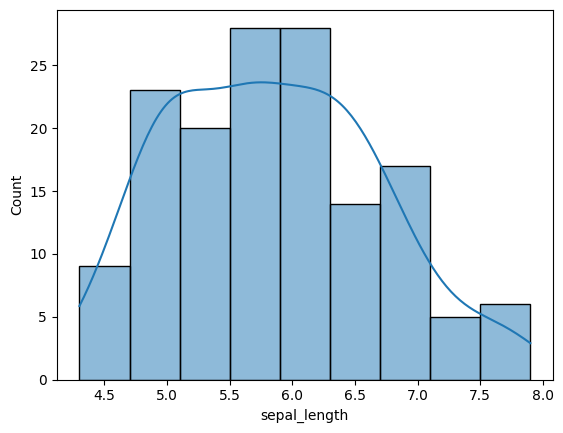

In [19]:
sns.histplot(x = df['sepal_length'], kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

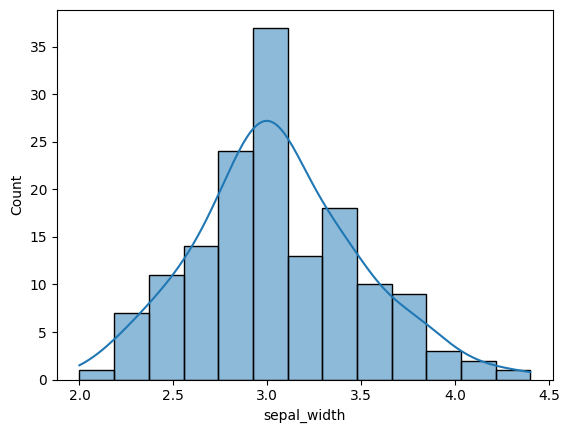

In [20]:
sns.histplot(x = df['sepal_width'], kde=True)

<Axes: xlabel='petal_width', ylabel='Count'>

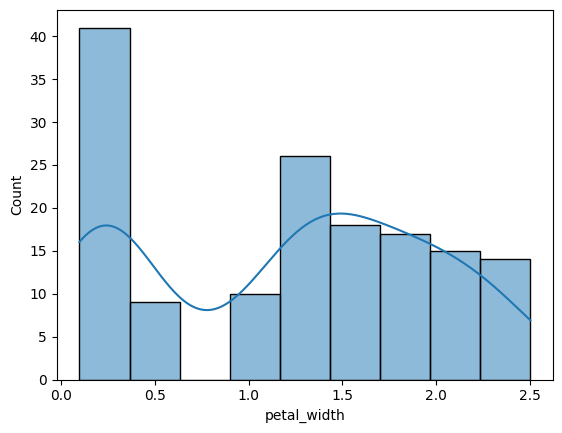

In [21]:
sns.histplot(x = df['petal_width'], kde=True)

<Axes: >

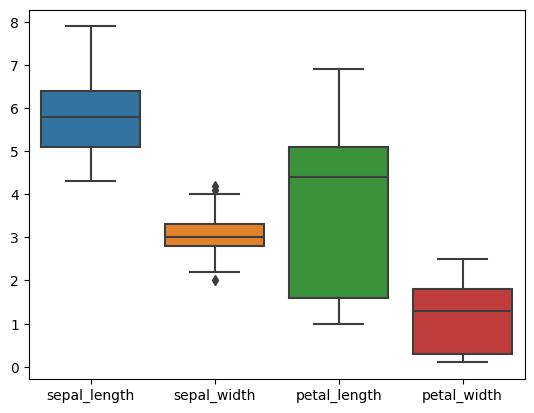

In [25]:
sns.boxplot(df)

In [24]:
from scipy.stats import zscore

# Calculate the z-scores for the 'sepal_width' column
z_scores = zscore(df['sepal_width'])

# Define a threshold value for outlier detection (e.g., z-score > 3)
threshold = 3

# Create a boolean mask for outliers
outliers_mask = (z_scores > threshold) | (z_scores < -threshold)

# Remove the outliers from the DataFrame
df = df[~outliers_mask]

# Check the dimensions of the DataFrame after removing outliers
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df.shape)

Original DataFrame shape: (149, 5)
DataFrame shape after removing outliers: (149, 5)


In [40]:
from sklearn.model_selection import train_test_split
df['target'] = df['species']
X=df.drop('species',axis=1)
y=df['species']
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TP, FP, TN, FN from the confusion matrix
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

# Compute accuracy, error rate, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the results
print("Confusion Matrix:")
print(cm)
print("\nTP:", TP)
print("FP:", FP)
print("TN:", TN)
print("FN:", FN)
print("\nAccuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)



Confusion Matrix:
[[19  0  0]
 [ 0  8  5]
 [ 0  1 12]]

TP: 8
FP: 0
TN: 19
FN: 0

Accuracy: 0.8666666666666667
Error Rate: 0.1333333333333333
Precision: 0.8829339143064634
Recall: 0.8666666666666667


<Axes: ylabel='species'>

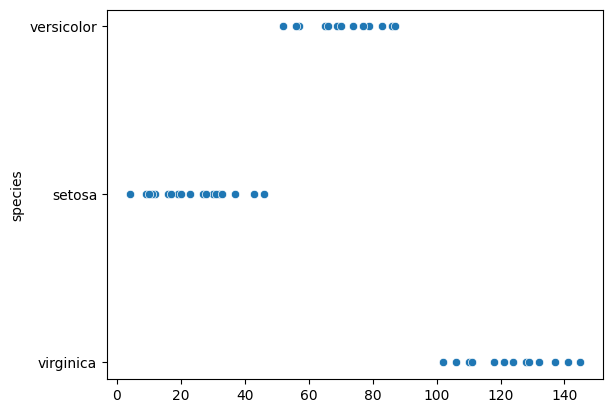

In [46]:
import matplotlib.pyplot as plt
sns.scatterplot(y_test)

<Axes: >

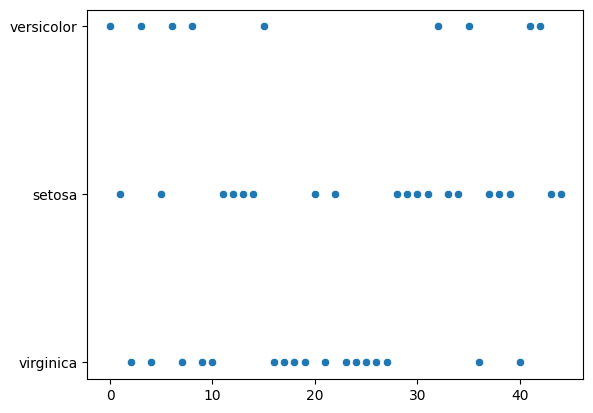

In [47]:
import matplotlib.pyplot as plt
sns.scatterplot(y_pred)